In [1]:
# Task4
# Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day.
# Visualize accident hotspots and contributing factors.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df4 = pd.read_csv("traffic_accidents.csv")
df4.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13.0,7.0,7.0
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,8.0
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10.0,5.0,12.0
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19.0,4.0,8.0
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14.0,7.0,8.0


In [2]:
print("check missing values")
df4.isnull().sum()

check missing values


crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        1
most_severe_injury               1
injuries_total                   1
injuries_fatal                   1
injuries_incapacitating          1
injuries_non_incapacitating      1
injuries_reported_not_evident    1
injuries_no_indication           1
crash_hour                       1
crash_day_of_week                1
crash_month                      1
dtype: int64

In [3]:
df4 = df4.dropna()
print("Drop missing values")
df4.isnull().sum()

Drop missing values


crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

Accidents by Hour of Day


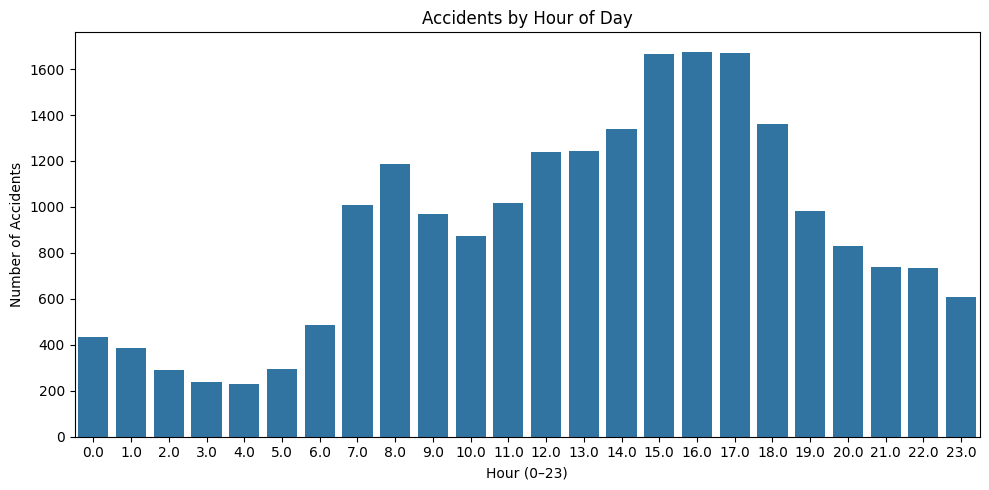

In [5]:
day_map = {
    1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'
}

df4['crash_day_name'] = df4['crash_day_of_week'].map(day_map)

print("Accidents by Hour of Day")
plt.figure(figsize=(10,5))
sns.countplot(data=df4, x='crash_hour')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

Accidents by Day of the Week


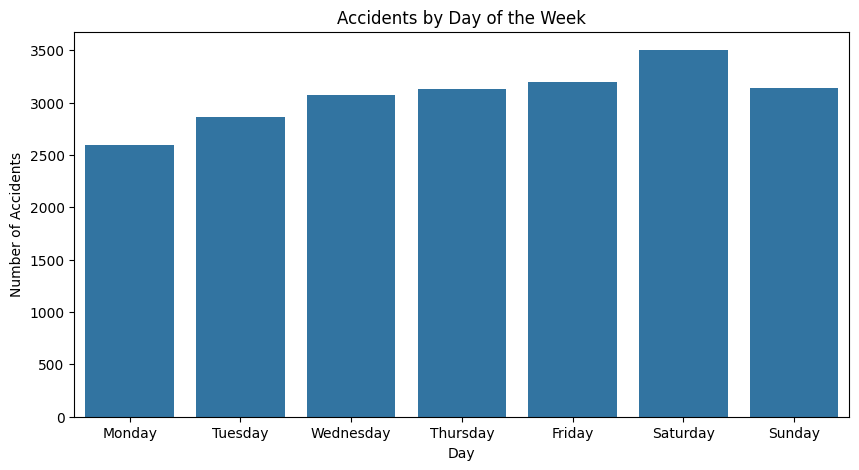

In [6]:
print("Accidents by Day of the Week")
plt.figure(figsize=(10,5))
sns.countplot(data=df4, x='crash_day_name',order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Accidents by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.show()

Accidents by Weather Condition (Top 7)


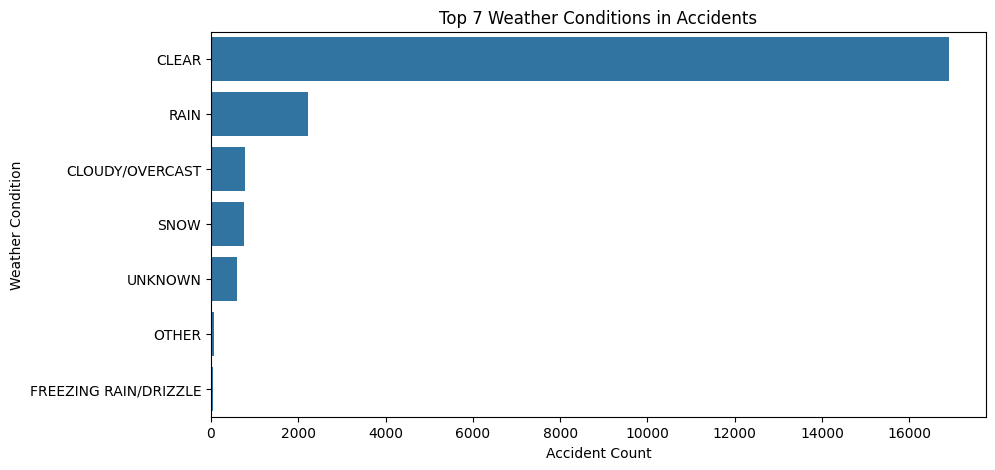

In [9]:
print("Accidents by Weather Condition (Top 7)")
top_weather = df4['weather_condition'].value_counts().nlargest(7).index
plt.figure(figsize=(10,5))
sns.countplot(data=df4[df4['weather_condition'].isin(top_weather)],y='weather_condition', order=top_weather)
plt.title("Top 7 Weather Conditions in Accidents")
plt.xlabel("Accident Count")
plt.ylabel("Weather Condition")
plt.show()

Accidents by Road Surface Condition


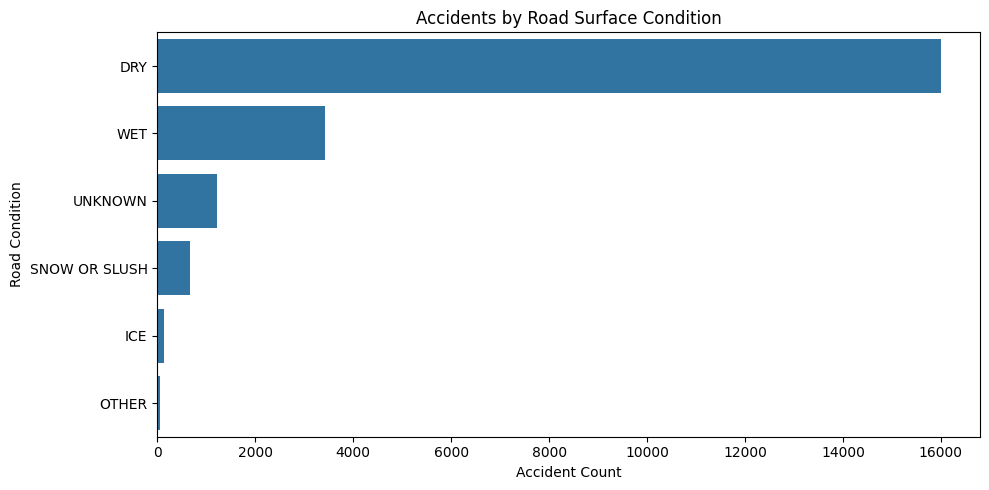

In [10]:
print("Accidents by Road Surface Condition")
top_road = df4['roadway_surface_cond'].value_counts().nlargest(6).index
plt.figure(figsize=(10,5))
sns.countplot(data=df4[df4['roadway_surface_cond'].isin(top_road)],y='roadway_surface_cond', order=top_road)
plt.title("Accidents by Road Surface Condition")
plt.xlabel("Accident Count")
plt.ylabel("Road Condition")
plt.tight_layout()
plt.show()